In [3]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [4]:
with open('./lt_df_Ali_8days.pkl', 'rb') as file:
    lt_df = pickle.load(file)

In [5]:
lt_df[0].columns

Index(['uid', 'hist_iid', 'hist_cid', 'target_iid', 'target_cid', 'next_iid',
       'next_cid', 'knn_rank', 'NN_rank', 'DIN_rank', 'DIEN_rank'],
      dtype='object')

In [6]:
lt_df[0]

,uid,hist_iid,hist_cid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank
0,7,"[980099, 3427154, 2689961, 2292610, 4034225, 5...","[2355072, 4801426, 4756105, 4756105, 3607361, ...",2063176,149192,1793668,2520377,53.00,40,95,45
1,96,"[3005381, 4160584]","[1464116, 3607361]",4160584,3607361,13283,3607361,5.00,7,15,94
2,152,"[842950, 3048082, 3682882]","[4145813, 4181361, 4181361]",3682882,4181361,3739757,4181361,6.00,6,45,18
3,239,"[709710, 4826455, 709710, 1992230, 1842641, 45...","[1787510, 1787510, 1787510, 2465336, 2976589, ...",5030834,1787510,24834,1787510,28.00,16,89,11
4,339,"[3437026, 3523692, 1850821, 1687195, 2487310, ...","[3738615, 2558244, 4756105, 4022701, 3738615, ...",222342,4244487,1692072,4244487,4.00,1,50,61
...,...,...,...,...,...,...,...,...,...,...,...
14738,1017455,"[3878908, 2029728, 4877816, 4736367, 1387695]","[982926, 149192, 4801426, 5042232, 4756105]",1387695,4756105,1584827,4756105,2.00,24,10,20
14739,1017559,"[969064, 7521, 1367959, 812391, 4257874]","[903809, 903809, 903809, 903809, 903809]",4257874,903809,2736720,903809,34.00,80,40,39
14740,1017591,"[777173, 2503250, 4551433]","[2885642, 2885642, 2885642]",4551433,2885642,2157244,2885642,38.00,91,3,51
14741,1017830,"[2382143, 964233, 310906, 4676590]","[4801426, 4801426, 4801426, 2096639]",4676590,2096639,2609472,2096639,97.00,67,51,30


In [7]:
def gen_label(df):
    if df.knn_rank <= df.NN_rank and  df.knn_rank <= df.DIN_rank and df.knn_rank <= df.DIEN_rank:
        label = 0
    elif df.NN_rank <= df.knn_rank and  df.NN_rank <= df.DIN_rank and df.NN_rank <= df.DIEN_rank:
        label = 1
    elif df.DIN_rank <= df.knn_rank and  df.DIN_rank <= df.NN_rank and df.DIN_rank <= df.DIEN_rank:
        label = 2
    elif df.DIEN_rank <= df.knn_rank and  df.DIEN_rank <= df.NN_rank and df.DIEN_rank <= df.DIN_rank:
        label = 3
    return label

In [8]:
for df in tqdm(lt_df):
    df['label'] = df.apply(gen_label, axis=1)

100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


In [9]:
# for df in tqdm(lt_df):
#     df['hist_len'] = df.apply(lambda df: len(eval(str(df['hist_iid']))), axis=1)

In [10]:
from keras.utils import to_categorical
for df in tqdm(lt_df):
    df['train_label'] = df.apply(lambda df: to_categorical(df['label'], num_classes=4), axis=1)

Using TensorFlow backend.
100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


In [11]:
for i in range(8):
    lt_df[i].drop(columns=['uid', 'hist_iid', 'hist_cid', 'target_cid', 'next_cid'], inplace=True)

---

In [12]:
full_table = pd.concat(lt_df[:4], ignore_index=True)

In [13]:
full_table['label'].value_counts()

0    21690
1    16791
2     7981
3     7706
Name: label, dtype: int64

In [14]:
full_table.describe()

,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label
count,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00
mean,2587004.15,2574953.51,29.96,31.87,47.95,50.33,1.03
std,1471552.96,1470099.37,28.08,27.83,28.03,28.86,1.06
min,324.00,81.00,1.00,1.00,1.00,1.00,0.00
25%,1329654.00,1320039.75,6.00,8.00,24.00,25.00,0.00
50%,2596902.00,2566203.00,20.00,24.00,46.00,51.00,1.00
75%,3850265.00,3847054.00,49.00,51.00,71.00,75.00,2.00
max,5163006.00,5162806.00,99.00,99.00,99.00,99.00,3.00


In [15]:
table_grby = full_table.groupby(['target_iid'])
# pd.DataFrame(table_grby.size())

In [16]:
df_table  = pd.merge(full_table, pd.DataFrame(table_grby.size()), on=['target_iid'], how='left')
df_table.rename(columns = {0:'target_occur'}, inplace=True)

In [17]:
max_occur_target = max(df_table['target_occur'])

In [18]:
df_table['target_log'] = df_table.apply(lambda df: log10(df['target_occur'])/log10(max_occur_target), axis=1)

In [19]:
table_grby_next = full_table.groupby(['next_iid'])
# pd.DataFrame(table_grby_next.size())

In [20]:
df_table  = pd.merge(df_table, pd.DataFrame(table_grby_next.size()), on=['next_iid'], how='left')
df_table.rename(columns = {0:'next_occur'}, inplace=True)

In [21]:
max_occur_next = max(df_table['next_occur'])

In [22]:
df_table['next_log'] = df_table.apply(lambda df: log10(df['next_occur'])/log10(max_occur_next), axis=1)

In [23]:
df_table

,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,train_label,target_occur,target_log,next_occur,next_log
0,2063176,1793668,53.00,40,95.00,45,1,"[0.0, 1.0, 0.0, 0.0]",4,0.27,3,0.21
1,4160584,13283,5.00,7,15.00,94,0,"[1.0, 0.0, 0.0, 0.0]",1,0.00,1,0.00
2,3682882,3739757,6.00,6,45.00,18,0,"[1.0, 0.0, 0.0, 0.0]",1,0.00,3,0.21
3,5030834,24834,28.00,16,89.00,11,3,"[0.0, 0.0, 0.0, 1.0]",15,0.52,15,0.51
4,222342,1692072,4.00,1,50.00,61,1,"[0.0, 1.0, 0.0, 0.0]",28,0.64,19,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
54163,3251448,3916424,6.00,2,37.00,28,1,"[0.0, 1.0, 0.0, 0.0]",26,0.63,10,0.43
54164,2663450,3941700,18.00,33,79.00,86,0,"[1.0, 0.0, 0.0, 0.0]",12,0.48,5,0.30
54165,2415077,3198981,22.00,11,19.00,70,1,"[0.0, 1.0, 0.0, 0.0]",1,0.00,2,0.13
54166,2760413,3834207,8.00,19,24.00,97,0,"[1.0, 0.0, 0.0, 0.0]",7,0.38,7,0.36


In [24]:
df_table.describe()

,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,target_occur,target_log,next_occur,next_log
count,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00
mean,2587004.15,2574953.51,29.96,31.87,47.95,50.33,1.03,15.09,0.35,13.93,0.34
std,1471552.96,1470099.37,28.08,27.83,28.03,28.86,1.06,26.11,0.26,25.10,0.23
min,324.00,81.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
25%,1329654.00,1320039.75,6.00,8.00,24.00,25.00,0.00,2.00,0.13,2.00,0.13
50%,2596902.00,2566203.00,20.00,24.00,46.00,51.00,1.00,6.00,0.35,6.00,0.34
75%,3850265.00,3847054.00,49.00,51.00,71.00,75.00,2.00,16.00,0.53,14.00,0.49
max,5163006.00,5162806.00,99.00,99.00,99.00,99.00,3.00,179.00,1.00,208.00,1.00


---

In [34]:
model_w2v = Word2Vec.load("../Taobao_v3/iid_1days.model")

In [51]:
training_data = []
not_exist_id = []
Ground_Truth = []
for row in tqdm(df_table.iterrows()):
    if str(row[1]['target_iid']) not in model_w2v.wv:
        not_exist_id.append(row[1]['target_iid'])
        continue
    if str(row[1]['next_iid']) not in model_w2v.wv:
        not_exist_id.append(row[1]['next_iid'])
        continue
    freq = np.append([row[1]['target_log']], [row[1]['next_log']])
    emb_pair = np.append(model_w2v.wv[str(row[1]['target_iid'])], model_w2v.wv[str(row[1]['next_iid'])])
    embedding = np.append(freq, emb_pair)
    training_data.append(embedding)
    Ground_Truth.append(row[1]['train_label'])

54168it [00:08, 6240.73it/s]


In [52]:
training_data = np.array(training_data)

In [53]:
Ground_Truth = np.array(Ground_Truth)

In [54]:
training_data.shape

(54168, 258)

In [55]:
len(Ground_Truth)

54168

In [56]:
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, losses, metrics, callbacks

In [57]:
pd.DataFrame(Ground_Truth).sum()

0   21690.00
1   16791.00
2    7981.00
3    7706.00
dtype: float32

In [59]:
X_train, y_train = training_data, Ground_Truth

In [63]:
model = models.Sequential()
model.add(layers.Dense(512, activation='linear', input_shape=(258,)))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(128, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(4, activation='sigmoid'))

In [64]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               132608    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [66]:
# checkpoint
filepath = './saved_model/' + 'Ali_switch' + '_' + time.strftime("%m%d", time.localtime()) + "_G.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [67]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=.3,
                    verbose=1,
                    callbacks=callbacks_list)

Train on 37917 samples, validate on 16251 samples
Epoch 1/20
37917/37917 [==============================] - 2s 42us/step - loss: 1.2358 - categorical_accuracy: 0.4353 - val_loss: 1.2275 - val_categorical_accuracy: 0.4407

Epoch 00001: val_loss improved from inf to 1.22748, saving model to ./saved_model/Ali_switch_0602_G.h5
Epoch 2/20
37917/37917 [==============================] - 1s 39us/step - loss: 1.1968 - categorical_accuracy: 0.4705 - val_loss: 1.1998 - val_categorical_accuracy: 0.4678

Epoch 00002: val_loss improved from 1.22748 to 1.19982, saving model to ./saved_model/Ali_switch_0602_G.h5
Epoch 3/20
37917/37917 [==============================] - 1s 39us/step - loss: 1.1854 - categorical_accuracy: 0.4777 - val_loss: 1.1891 - val_categorical_accuracy: 0.4802

Epoch 00003: val_loss improved from 1.19982 to 1.18912, saving model to ./saved_model/Ali_switch_0602_G.h5
Epoch 4/20
37917/37917 [==============================] - 1s 39us/step - loss: 1.1767 - categorical_accuracy: 0.4823 

In [68]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

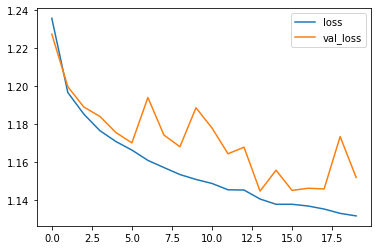

In [69]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

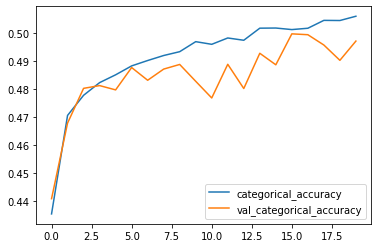

In [70]:
pd.DataFrame(history.history)[['categorical_accuracy', 'val_categorical_accuracy']].plot()

---

In [481]:
model = models.load_model('./saved_model/Ali_switch_0602_G.h5')

In [71]:
target_log_dict = {}
next_log_dict = {}
for row in tqdm(df_table.iterrows()):
    target_log_dict[row[1]['target_iid']] = row[1]['target_log']
    next_log_dict[row[1]['next_iid']] = row[1]['next_log']

54168it [00:04, 11226.40it/s]


In [72]:
len(target_log_dict)

18030

In [74]:
len(next_log_dict)

16485

In [76]:
with open('freq_dict.pkl', 'wb') as file:
    pickle.dump((target_log_dict, next_log_dict), file)

In [77]:
next_log_dict[2760413]

0.25972542779450597

---

In [25]:
df_table_testday = pd.concat(lt_df[4:], ignore_index=True)

In [26]:
# df_table_testday.drop_duplicates(inplace=True, ignore_index=True)

In [27]:
df_table_testday.describe()

,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label
count,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00
mean,2583610.90,2583089.62,30.08,32.00,47.66,50.02,1.05
std,1475124.52,1469947.44,28.00,27.84,27.97,28.79,1.06
min,72.00,608.00,1.00,1.00,1.00,1.00,0.00
25%,1320123.00,1341094.75,6.00,8.00,24.00,25.00,0.00
50%,2598281.00,2587102.50,20.00,24.00,46.00,50.00,1.00
75%,3849172.00,3853076.00,49.00,51.00,71.00,75.00,2.00
max,5162674.00,5163006.00,99.00,99.00,99.00,99.00,3.00


In [28]:
df_table_testday = pd.merge(df_table_testday, pd.DataFrame(table_grby.size()), on=['target_iid'], how='left')

In [29]:
df_table_testday.rename(columns = {0:'target_occur'}, inplace=True)

In [30]:
df_table_testday['target_occur'].fillna(1, inplace=True)

In [31]:
df_table_testday = pd.merge(df_table_testday, pd.DataFrame(table_grby_next.size()), on=['next_iid'], how='left')

In [32]:
df_table_testday.rename(columns = {0:'next_occur'}, inplace=True)

In [33]:
df_table_testday['next_occur'].fillna(1, inplace=True)

---

In [29]:
table_grby = full_table.groupby(['target_iid'])
pd.DataFrame(table_grby.size())

,0
target_iid,
324,1
764,1
1006,1
1197,1
1260,2
...,...
5162394,2
5162674,1
5162860,1


In [19]:
df_table  = pd.merge(full_table, pd.DataFrame(table_grby.size()), on=['target_iid'], how='left')
df_table.rename(columns = {0:'target_occur'}, inplace=True)

In [20]:
max_occur_target = max(df_table['target_occur'])

In [21]:
df_table['target_log'] = df_table.apply(lambda df: log10(df['target_occur'])/log10(max_occur_target), axis=1)

In [22]:
df_table

,uid,hist_iid,hist_cid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,train_label,target_occur,target_log
0,7,"[980099, 3427154, 2689961, 2292610, 4034225, 5...","[2355072, 4801426, 4756105, 4756105, 3607361, ...",2063176,149192,1793668,2520377,53.00,40,95.00,45,1,16,"[0.0, 1.0, 0.0, 0.0]",4,0.27
1,96,"[3005381, 4160584]","[1464116, 3607361]",4160584,3607361,13283,3607361,5.00,7,15.00,94,0,2,"[1.0, 0.0, 0.0, 0.0]",1,0.00
2,152,"[842950, 3048082, 3682882]","[4145813, 4181361, 4181361]",3682882,4181361,3739757,4181361,6.00,6,45.00,18,0,3,"[1.0, 0.0, 0.0, 0.0]",1,0.00
3,239,"[709710, 4826455, 709710, 1992230, 1842641, 45...","[1787510, 1787510, 1787510, 2465336, 2976589, ...",5030834,1787510,24834,1787510,28.00,16,89.00,11,3,66,"[0.0, 0.0, 0.0, 1.0]",15,0.52
4,339,"[3437026, 3523692, 1850821, 1687195, 2487310, ...","[3738615, 2558244, 4756105, 4022701, 3738615, ...",222342,4244487,1692072,4244487,4.00,1,50.00,61,1,17,"[0.0, 1.0, 0.0, 0.0]",28,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54163,1017568,"[2588261, 3012274, 3251448]","[4462359, 4462359, 4462359]",3251448,4462359,3916424,4462359,6.00,2,37.00,28,1,3,"[0.0, 1.0, 0.0, 0.0]",26,0.63
54164,1017699,"[4093995, 4624511, 2501731, 10108, 2663450]","[1464116, 1464116, 4145813, 1464116, 1464116]",2663450,1464116,3941700,1464116,18.00,33,79.00,86,0,5,"[1.0, 0.0, 0.0, 0.0]",12,0.48
54165,1017725,"[1586145, 2523726, 4974006, 1177678, 4505760, ...","[3002561, 3002561, 3002561, 3002561, 3002561, ...",2415077,2355072,3198981,2355072,22.00,11,19.00,70,1,42,"[0.0, 1.0, 0.0, 0.0]",1,0.00
54166,1017744,"[1498368, 5104260, 2334734, 2926378, 1920864, ...","[846990, 982926, 2520377, 2520377, 2520377, 25...",2760413,2465336,3834207,2735466,8.00,19,24.00,97,0,23,"[1.0, 0.0, 0.0, 0.0]",7,0.38


In [23]:
table_grby_next = full_table.groupby(['next_iid'])
pd.DataFrame(table_grby_next.size())

,0
next_iid,
81,1
142,1
764,1
1006,3
1197,6
...,...
5161600,1
5161641,1
5161668,1


In [24]:
df_table  = pd.merge(df_table, pd.DataFrame(table_grby_next.size()), on=['next_iid'], how='left')
df_table.rename(columns = {0:'next_occur'}, inplace=True)

In [25]:
max_occur_next = max(df_table['next_occur'])

In [26]:
df_table['next_log'] = df_table.apply(lambda df: log10(df['next_occur'])/log10(max_occur_next), axis=1)

---

In [34]:
pred_dict = {}
for part in range(1, 5):
    with open('pred_dict/pred_dict_' + str(part) + '.pkl', 'rb') as file:
        pred_dict.update(pickle.load(file))

In [35]:
len(pred_dict)

1550512

In [36]:
with open('./freq_dict.pkl', 'rb') as file:
    target_log_dict, next_log_dict = pickle.load(file)

In [37]:
model_w2v = Word2Vec.load("../Taobao_v3/iid_1days.model")

In [40]:
from keras import models
model = models.load_model('./saved_model/Ali_switch_0524_F.h5')

In [41]:
# def pred(df):
#     if str(df['target_iid']) not in model_w2v.wv:
#         return 0
#     else:
#         return np.argmax(model.predict(np.append(model_w2v.wv[str(df['target_iid'])], df['occur_log']).reshape(1, -1))[0])
def pred(df):
    if (df['target_iid'] not in target_log_dict) or (df['next_iid'] not in next_log_dict):
        if str(df['target_iid']) not in model_w2v.wv:
            return 0
        else:
            return np.argmax(model.predict(np.append(model_w2v.wv[str(df['target_iid'])], df['target_log']).reshape(1, -1))[0])        
    if df['target_iid'] not in pred_dict:
        exit(df['target_iid'] + 'not in pred_dict')
    else:
        return pred_dict[df['target_iid']]

In [42]:
def label_switch(df):
    label = df['pred']
    rank = None
    if label == 0:
        rank = df['knn_rank']
    elif label == 1:
        rank = df['NN_rank']
    elif label == 2:
        rank = df['DIN_rank']
    elif label == 3:
        rank = df['DIEN_rank']
    return rank

In [43]:
max_occur_target = max(df_table_testday['target_occur'])

In [44]:
max_occur_next = max(df_table_testday['next_occur'])

In [45]:
df_table_testday['target_log'] = df_table_testday.apply(lambda df: log10(df['target_occur'])/log10(max_occur_target), axis=1)

In [46]:
df_table_testday['next_log'] = df_table_testday.apply(lambda df: log10(df['next_occur'])/log10(max_occur_next), axis=1)

In [47]:
df_table_testday['pred'] = df_table_testday.apply(pred, axis=1)

In [48]:
df_table_testday['pred_rank'] = df_table_testday.apply(label_switch, axis=1)

In [49]:
df_table_testday.describe()

,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,target_occur,next_occur,target_log,next_log,pred,pred_rank
count,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00
mean,2583610.90,2583089.62,30.08,32.00,47.66,50.02,1.05,14.39,13.31,0.32,0.31,0.57,34.81
std,1475124.52,1469947.44,28.00,27.84,27.97,28.79,1.06,25.61,25.03,0.27,0.25,0.87,29.21
min,72.00,608.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00
25%,1320123.00,1341094.75,6.00,8.00,24.00,25.00,0.00,1.00,1.00,0.00,0.00,0.00,9.00
50%,2598281.00,2587102.50,20.00,24.00,46.00,50.00,1.00,5.00,5.00,0.31,0.30,0.00,27.00
75%,3849172.00,3853076.00,49.00,51.00,71.00,75.00,2.00,16.00,13.00,0.53,0.48,1.00,57.00
max,5162674.00,5163006.00,99.00,99.00,99.00,99.00,3.00,179.00,208.00,1.00,1.00,3.00,99.00


In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_table_testday['label'].tolist(),df_table_testday['pred'].tolist()))

              precision    recall  f1-score   support

           0       0.41      0.68      0.51     22539
           1       0.28      0.13      0.17     17566
           2       0.13      0.16      0.14      8632
           3       0.12      0.02      0.04      8431

    accuracy                           0.33     57168
   macro avg       0.24      0.25      0.22     57168
weighted avg       0.29      0.33      0.28     57168



In [51]:
df_table_testday

,target_iid,next_iid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,train_label,target_occur,next_occur,target_log,next_log,pred,pred_rank
0,1994146,3715112,2.00,1,5.00,46,1,"[0.0, 1.0, 0.0, 0.0]",1.00,103.00,0.00,0.87,2,5.00
1,4749737,3119053,73.00,36,54.00,11,3,"[0.0, 0.0, 0.0, 1.0]",12.00,119.00,0.48,0.90,1,36.00
2,4788857,5133563,20.00,96,64.00,31,0,"[1.0, 0.0, 0.0, 0.0]",1.00,8.00,0.00,0.39,0,20.00
3,524337,4320227,94.00,3,48.00,75,1,"[0.0, 1.0, 0.0, 0.0]",1.00,1.00,0.00,0.00,0,94.00
4,582970,3031863,1.00,4,46.00,16,0,"[1.0, 0.0, 0.0, 0.0]",21.00,19.00,0.59,0.55,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57163,3251377,2944225,38.00,28,3.00,27,2,"[0.0, 0.0, 1.0, 0.0]",27.00,5.00,0.64,0.30,0,38.00
57164,2584880,1980098,1.00,17,64.00,11,0,"[1.0, 0.0, 0.0, 0.0]",4.00,3.00,0.27,0.21,0,1.00
57165,4852928,4632023,37.00,6,86.00,74,1,"[0.0, 1.0, 0.0, 0.0]",5.00,30.00,0.31,0.64,2,86.00
57166,3303427,4847230,21.00,23,64.00,34,0,"[1.0, 0.0, 0.0, 0.0]",17.00,2.00,0.55,0.13,2,64.00


In [462]:
y_train.tolist().count([0, 0, 0, 1])

7706